<a href="https://colab.research.google.com/github/nargyanti/PCVK_Genap_2022/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practicum

In [28]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

## Transformasi Linier Brightness

Formula: g(x, y) = f(x, y) + b
g(x, y) is pixel value after transformation, f(x, y_ is initial value of pixel, b is brightness value

Change image brightness
-----------------------
Input brightness value: 50


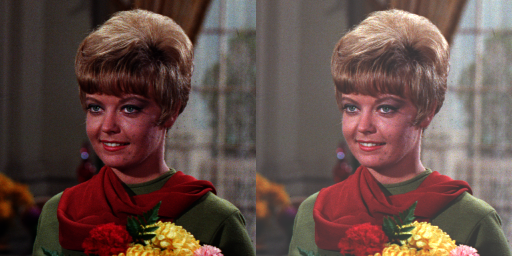

In [ ]:
print('Change image brightness')
print('-----------------------')
try:
  brightness = int(input('Input brightness value: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# simple way without loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Task

Change contrast and brightness
------------------------------
Input brightness value [-255 - 255]: 60
Input contrast value [1.0 - 3.0]: 1.5


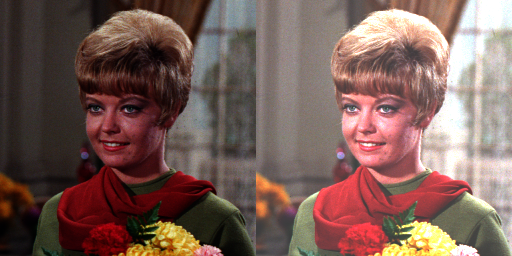

In [ ]:
# Contrast transformation
print('Change contrast and brightness')
print('------------------------------')
try:
  brightness = int(input('Input brightness value [-255 - 255]: '))
  contrast = float(input('Input contrast value [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
contrass_brightness_image = np.zeros(original.shape, original.dtype)

# access per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrass_brightness_image[y, x, c] = np.clip(contrast * original[y, x, c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrass_brightness_image))
cv2_imshow(final_frame)

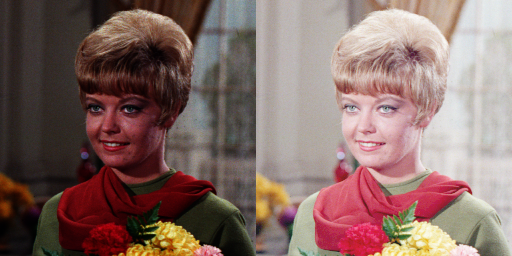

In [14]:
# Brightness with logarithmic transforms
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
log_image = np.zeros(original.shape, original.dtype)

c = 255 / np.log(1 + np.max(original))
log_image = c * (np.log(1 + original))      

log_image = np.array(log_image, dtype = np.uint8)

final_frame = cv.hconcat((original, log_image))
cv2_imshow(final_frame)

Grayscale Transformation - Luminance
----------------------------------


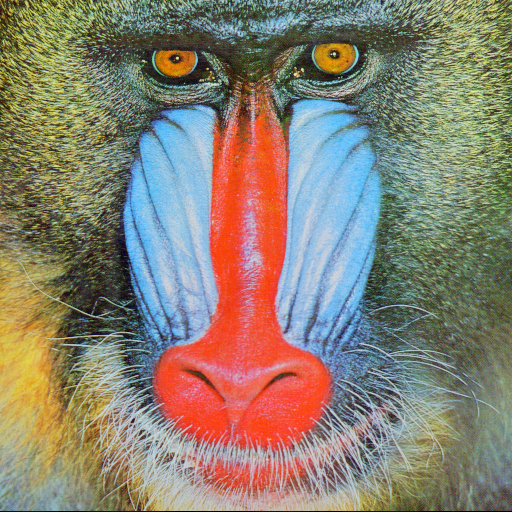

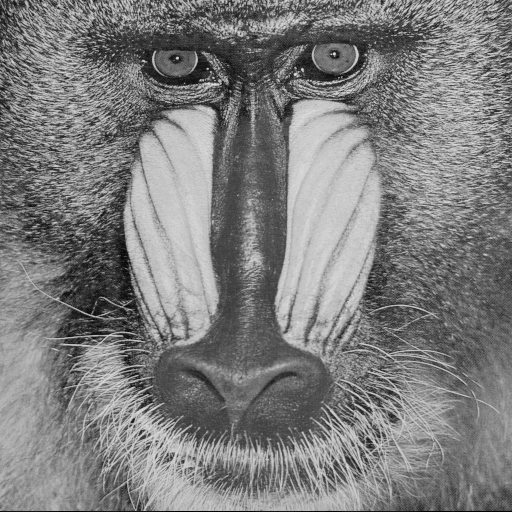

[[134.39  51.96  38.31 ... 108.15 153.48 172.67]
 [111.42  86.22  33.88 ... 129.92 150.88 123.3 ]
 [ 66.72 103.86  41.28 ...  94.12  87.78  74.61]
 ...
 [147.58 152.43 145.87 ...  72.86  87.96  75.87]
 [165.78 148.62 134.32 ...  79.87  74.67  65.87]
 [ 11.07  11.65  14.09 ...   7.16   3.74   4.3 ]]


In [55]:
# Grayscale transformation using luminance
print('Grayscale Transformation - Luminance')
print('----------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
grayscale_luminance_image = np.zeros(original.shape, original.dtype)

(R, G, B) = cv.split(original)
grayscale_luminance_image = 0.21 * R + 0.72 * G + 0.07 * B

cv2_imshow(original)
cv2_imshow(grayscale_luminance_image)

Grayscale Transformation - Average
----------------------------------


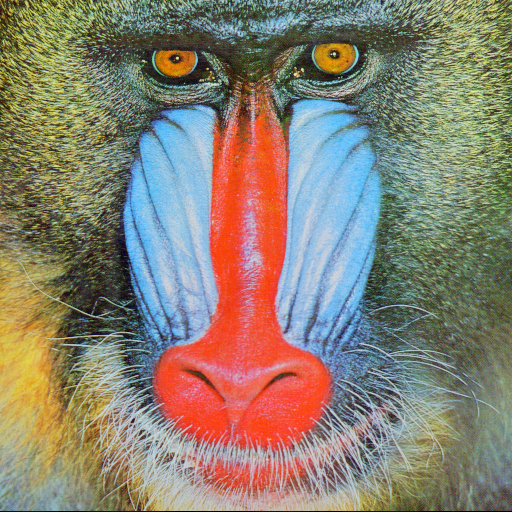

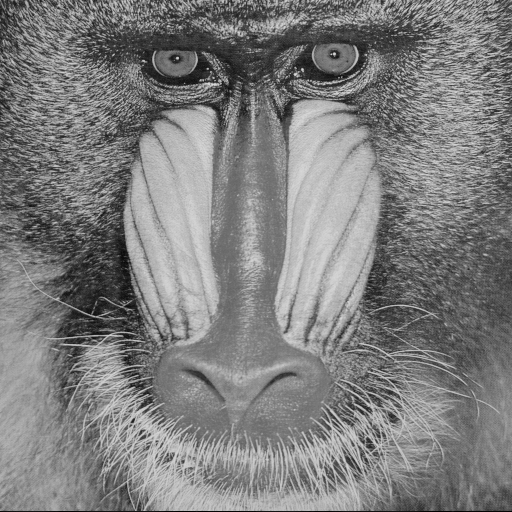

In [143]:
# Grayscale transformation using average
print('Grayscale Transformation - Average')
print('----------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
grayscale_average_image = np.zeros(original.shape, original.dtype)

(R, G, B) = cv.split(original)

grayscale_average_image = np.mean(np.array([R, G, B]),axis=0)

cv2_imshow(original)
cv2_imshow(grayscale_average_image)

Grayscale Transformation - Lightness
----------------------------------


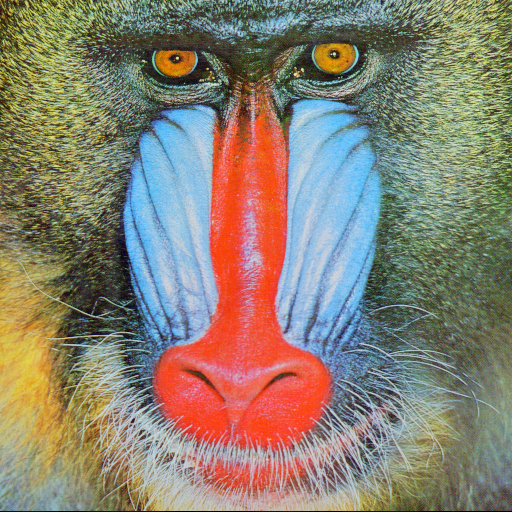

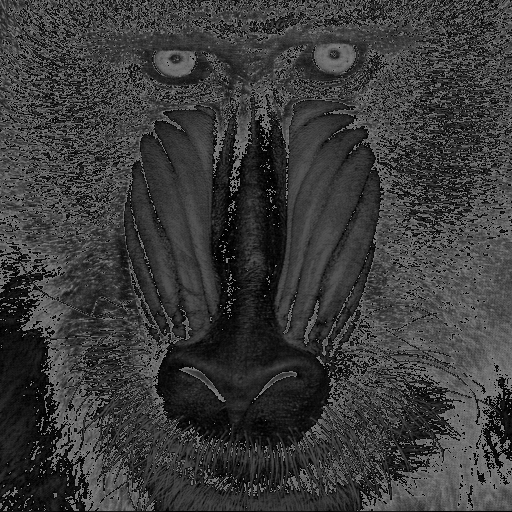

In [128]:
# Grayscale transformation using lightness
print('Grayscale Transformation - Lightness')
print('----------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')
grayscale_lightness_image = np.zeros(original.shape, original.dtype)

grayscale_lightness_image = np.clip((np.max(original,axis=-1) + np.min(original,axis=-1)) / 2, 0, 255)

cv2_imshow(original)
cv2_imshow(grayscale_lightness_image)

Show warm color
----------------------------------


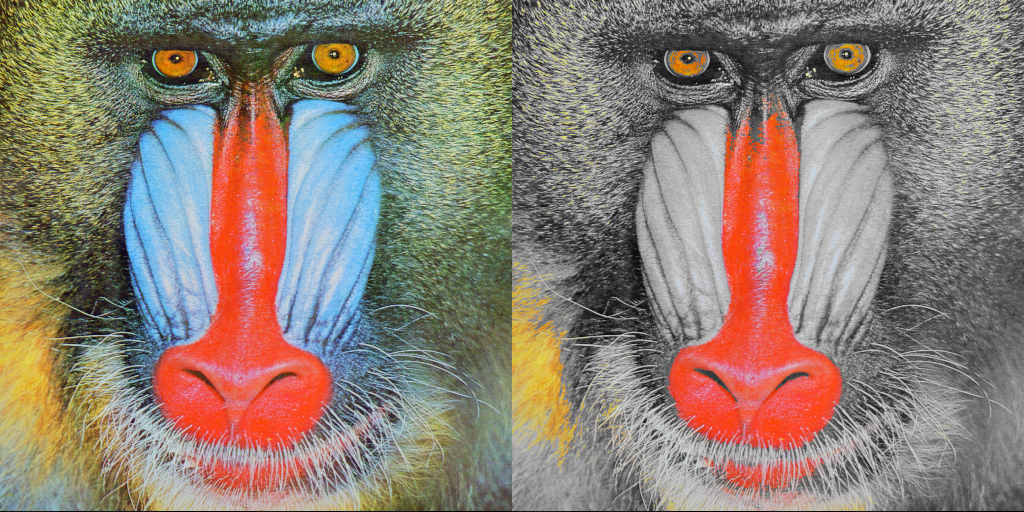

In [162]:
# Show warm color
print('Show warm color')
print('----------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff')

# creating mask using thresholding over red channel
ret, mask = cv.threshold(original[:, :,2], 190, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(original)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

# extracting warm region using `bitewise_and`
warm = cv.bitwise_and(original, mask3)

gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
img  = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# extracting non-warm region
gray = cv.bitwise_and(img, 255 - mask3)

# warm masked output
result = gray + warm

final_frame = cv.hconcat((original, result))
cv2_imshow(final_frame)

# References: https://stackoverflow.com/questions/63498826/opencv-python-how-to-keep-one-color-as-is-converting-an-image-to-grayscale

In [163]:
# Show warm color
# print('Show warm color')
# print('----------------------------------')

# original = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/mandrill.tiff'), cv.COLOR_RGB2HSV)
# red_nose_image = np.zeros(original.shape, original.dtype)

# orange = (232, 133, 12)
# red = (236, 74, 63)

# mask = cv.inRange(original, orange, red)
# result = cv.bitwise_and(original, original, mask=mask)
# plt.subplot(1, 2, 1)
# plt.imshow(mask, cmap="gray")
# plt.subplot(1, 2, 2)
# plt.imshow(result)
# plt.show()